# 1 IMPORT LIBRARIES

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import mutual_info_classif
from sklearn.feature_selection import SelectKBest
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, recall_score, precision_score, f1_score, roc_auc_score
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score




import warnings
warnings.filterwarnings("ignore")
print("Libraries imported")

ModuleNotFoundError: No module named 'matplotlib'

# 2 READ DATASET

In [ ]:
df = pd.read_csv('dataset/KDDTrain.csv')

## 2.1 Insights

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 125973 entries, 0 to 125972
Data columns (total 43 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   duration                     125973 non-null  int64  
 1   protocol_type                125973 non-null  object 
 2   service                      125973 non-null  object 
 3   flag                         125973 non-null  object 
 4   src_bytes                    125973 non-null  int64  
 5   dst_bytes                    125973 non-null  int64  
 6   land                         125973 non-null  int64  
 7   wrong_fragment               125973 non-null  int64  
 8   urgent                       125973 non-null  int64  
 9   hot                          125973 non-null  int64  
 10  num_failed_logins            125973 non-null  int64  
 11  logged_in                    125973 non-null  int64  
 12  num_compromised              125973 non-null  int64  
 13 

In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
duration,125973.0,287.144650,2.604515e+03,0.0,0.00,0.00,0.00,4.290800e+04
src_bytes,125973.0,45566.743000,5.870331e+06,0.0,0.00,44.00,276.00,1.379964e+09
dst_bytes,125973.0,19779.114421,4.021269e+06,0.0,0.00,0.00,516.00,1.309937e+09
land,125973.0,0.000198,1.408607e-02,0.0,0.00,0.00,0.00,1.000000e+00
wrong_fragment,125973.0,0.022687,2.535300e-01,0.0,0.00,0.00,0.00,3.000000e+00
urgent,125973.0,0.000111,1.436603e-02,0.0,0.00,0.00,0.00,3.000000e+00
hot,125973.0,0.204409,2.149968e+00,0.0,0.00,0.00,0.00,7.700000e+01
num_failed_logins,125973.0,0.001222,4.523914e-02,0.0,0.00,0.00,0.00,5.000000e+00
logged_in,125973.0,0.395736,4.890101e-01,0.0,0.00,0.00,1.00,1.000000e+00
num_compromised,125973.0,0.279250,2.394204e+01,0.0,0.00,0.00,0.00,7.479000e+03


There are some outlier values

# 3 DATA CLEANING

## 3.1 Null Values

In [ ]:
df.isnull().sum()

duration                       0
protocol_type                  0
service                        0
flag                           0
src_bytes                      0
dst_bytes                      0
land                           0
wrong_fragment                 0
urgent                         0
hot                            0
num_failed_logins              0
logged_in                      0
num_compromised                0
root_shell                     0
su_attempted                   0
num_root                       0
num_file_creations             0
num_shells                     0
num_access_files               0
num_outbound_cmds              0
is_host_login                  0
is_guest_login                 0
count                          0
srv_count                      0
serror_rate                    0
srv_serror_rate                0
rerror_rate                    0
srv_rerror_rate                0
same_srv_rate                  0
diff_srv_rate                  0
srv_diff_h

Dataset doesn't contain any null value

In [ ]:
def unique_values(df, columns):
    """Prints unique values and their counts for specific columns in the DataFrame."""

    for column_name in columns:
        print(f"Column: {column_name}\n{'-'*30}")
        unique_vals = df[column_name].unique()
        value_counts = df[column_name].value_counts()
        print(f"Unique Values ({len(unique_vals)}): {unique_vals}\n")
        print(f"Value Counts:\n{value_counts}\n{'='*40}\n")

cat_features = df.select_dtypes(include='object').columns
unique_values(df, cat_features)

Column: protocol_type
------------------------------
Unique Values (3): ['tcp' 'udp' 'icmp']

Value Counts:
protocol_type
tcp     102689
udp      14993
icmp      8291
Name: count, dtype: int64

Column: service
------------------------------
Unique Values (70): ['ftp_data' 'other' 'private' 'http' 'remote_job' 'name' 'netbios_ns'
 'eco_i' 'mtp' 'telnet' 'finger' 'domain_u' 'supdup' 'uucp_path' 'Z39_50'
 'smtp' 'csnet_ns' 'uucp' 'netbios_dgm' 'urp_i' 'auth' 'domain' 'ftp'
 'bgp' 'ldap' 'ecr_i' 'gopher' 'vmnet' 'systat' 'http_443' 'efs' 'whois'
 'imap4' 'iso_tsap' 'echo' 'klogin' 'link' 'sunrpc' 'login' 'kshell'
 'sql_net' 'time' 'hostnames' 'exec' 'ntp_u' 'discard' 'nntp' 'courier'
 'ctf' 'ssh' 'daytime' 'shell' 'netstat' 'pop_3' 'nnsp' 'IRC' 'pop_2'
 'printer' 'tim_i' 'pm_dump' 'red_i' 'netbios_ssn' 'rje' 'X11' 'urh_i'
 'http_8001' 'aol' 'http_2784' 'tftp_u' 'harvest']

Value Counts:
service
http         40338
private      21853
domain_u      9043
smtp          7313
ftp_data      6860
 

## 3.2 Duplicated Values

In [ ]:
print(df.duplicated().sum())

0


## 3.3 Outliers

In [ ]:
df.shape

(125973, 43)

<Figure size 2000x4000 with 0 Axes>

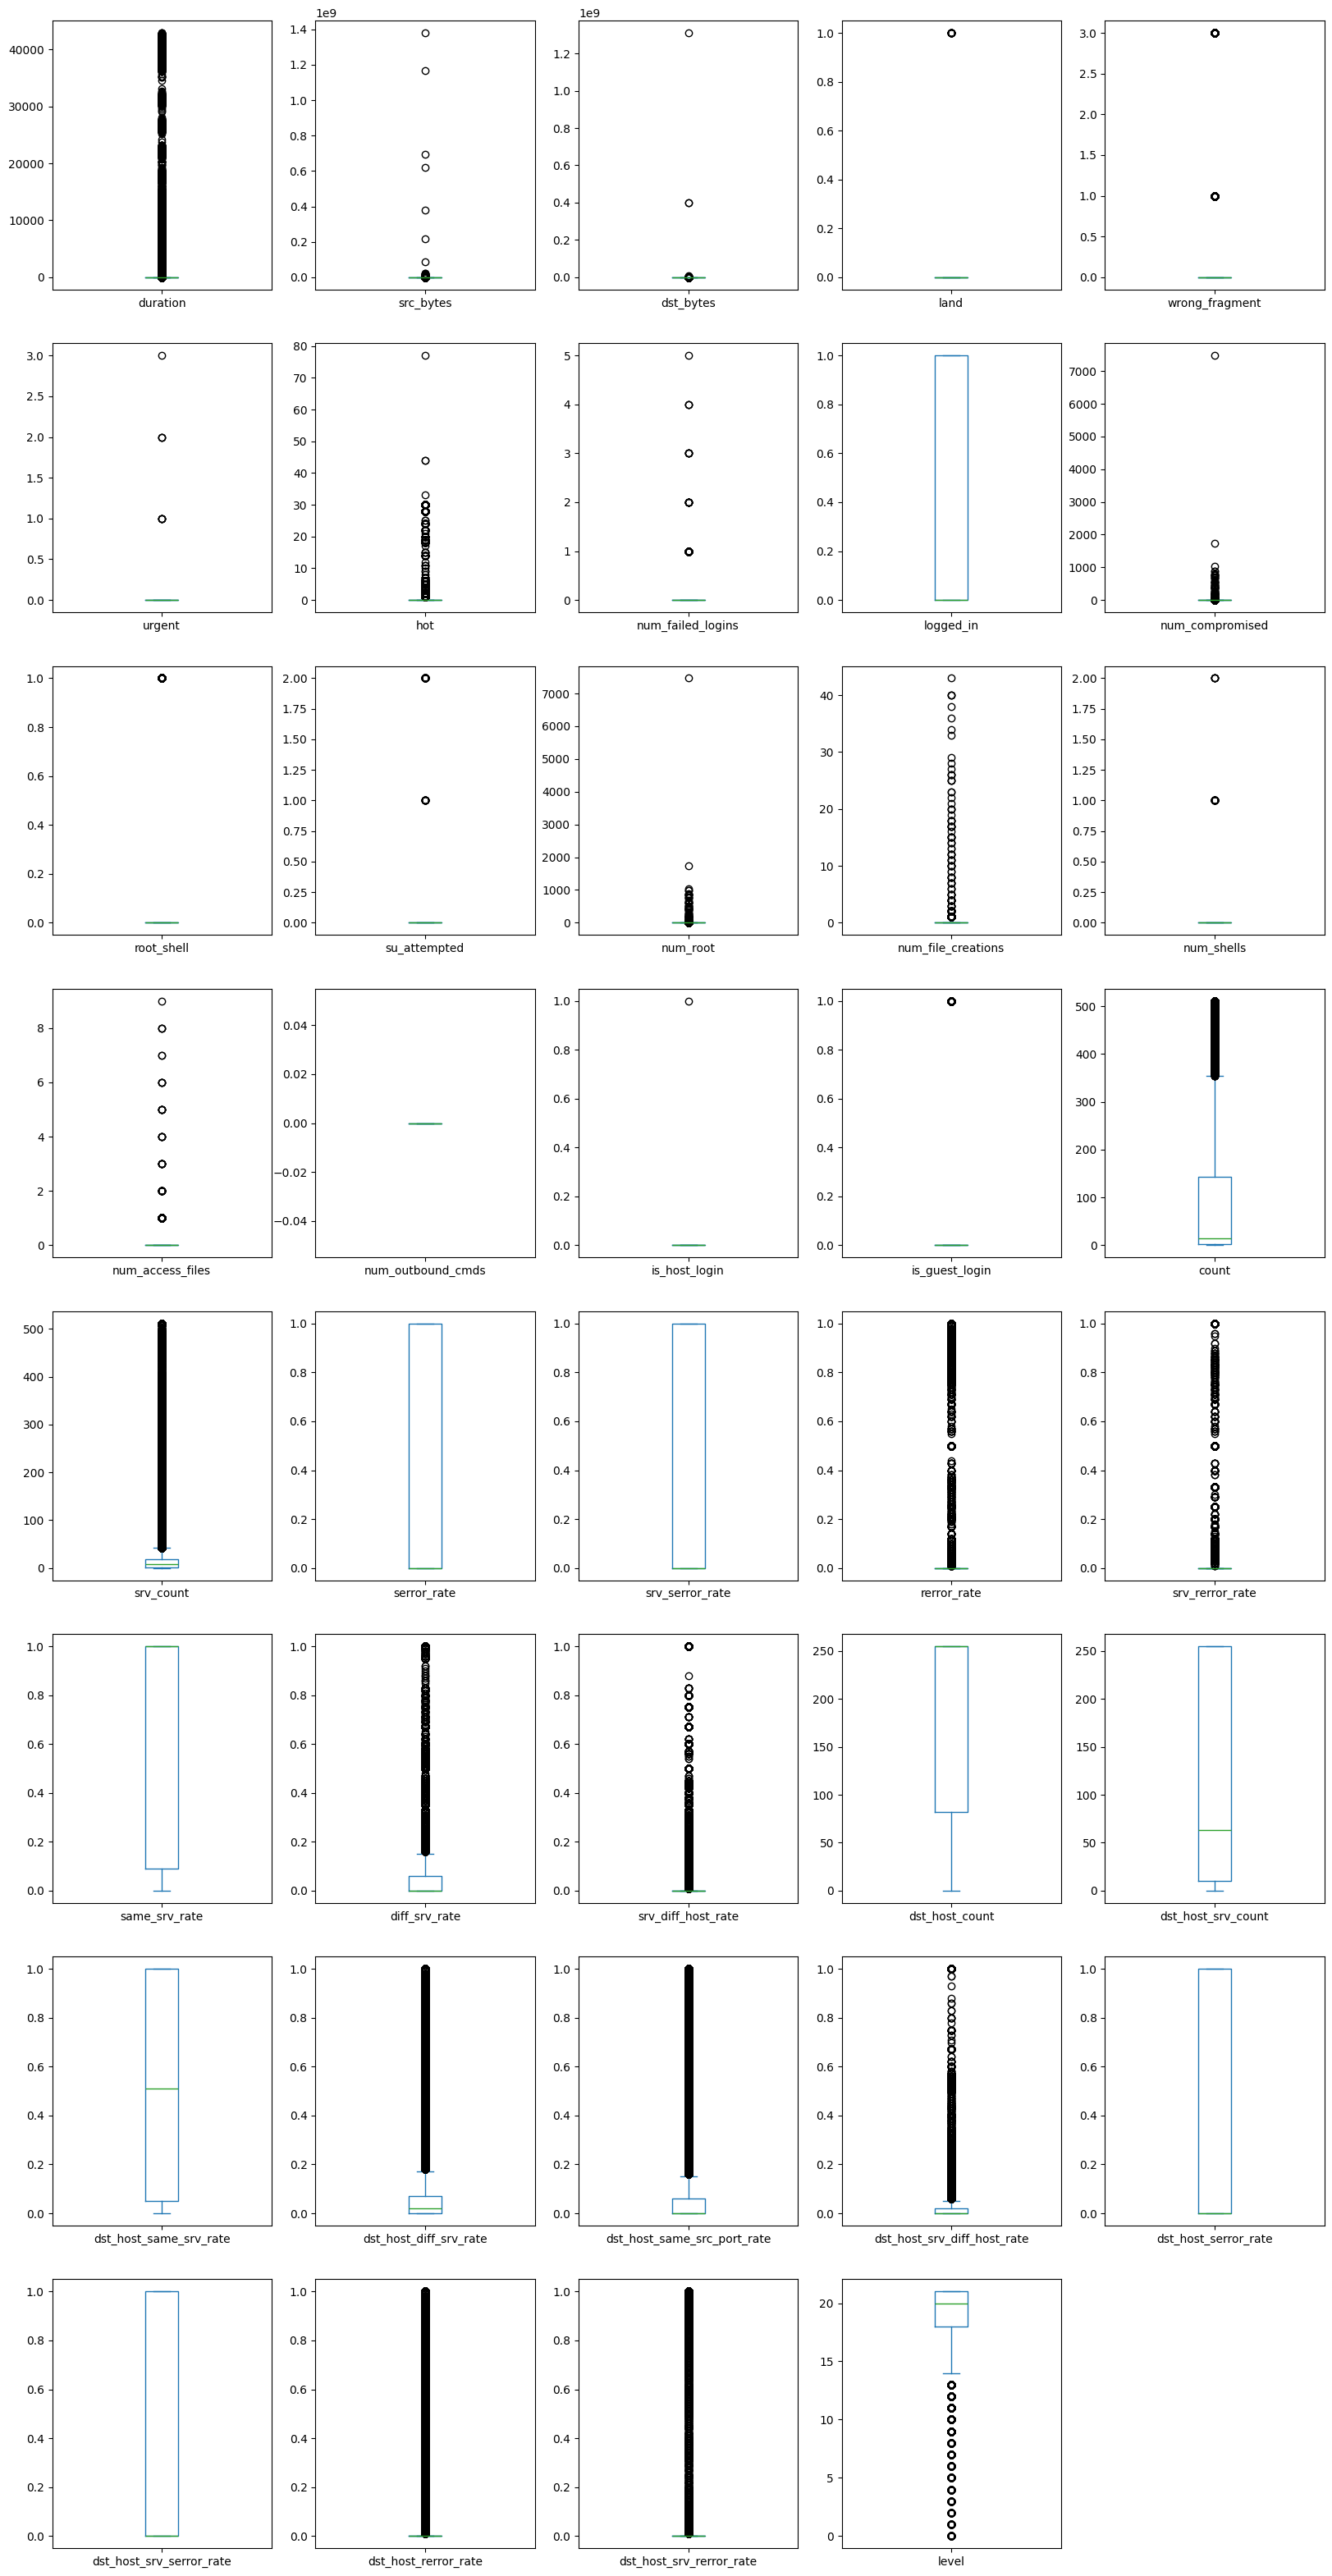

In [ ]:
plt.figure(figsize=(20, 40))
df.plot(kind='box', subplots=True, layout=(8, 5), figsize=(20, 40))
plt.show()

Not drop the outliers

## 3.4 Classify Attack Or Not

In [ ]:
attack_n = []
for i in df.attack:
  if i == 'normal':
    attack_n.append("normal")
  else:
    attack_n.append("attack")
df['attack'] = attack_n 

In [ ]:
df['attack'].unique()

array(['normal', 'attack'], dtype=object)

# 4 EDA

array([[<Axes: title={'center': 'duration'}>,
        <Axes: title={'center': 'src_bytes'}>,
        <Axes: title={'center': 'dst_bytes'}>,
        <Axes: title={'center': 'land'}>,
        <Axes: title={'center': 'wrong_fragment'}>,
        <Axes: title={'center': 'urgent'}>],
       [<Axes: title={'center': 'hot'}>,
        <Axes: title={'center': 'num_failed_logins'}>,
        <Axes: title={'center': 'logged_in'}>,
        <Axes: title={'center': 'num_compromised'}>,
        <Axes: title={'center': 'root_shell'}>,
        <Axes: title={'center': 'su_attempted'}>],
       [<Axes: title={'center': 'num_root'}>,
        <Axes: title={'center': 'num_file_creations'}>,
        <Axes: title={'center': 'num_shells'}>,
        <Axes: title={'center': 'num_access_files'}>,
        <Axes: title={'center': 'num_outbound_cmds'}>,
        <Axes: title={'center': 'is_host_login'}>],
       [<Axes: title={'center': 'is_guest_login'}>,
        <Axes: title={'center': 'count'}>,
        <Axes: title

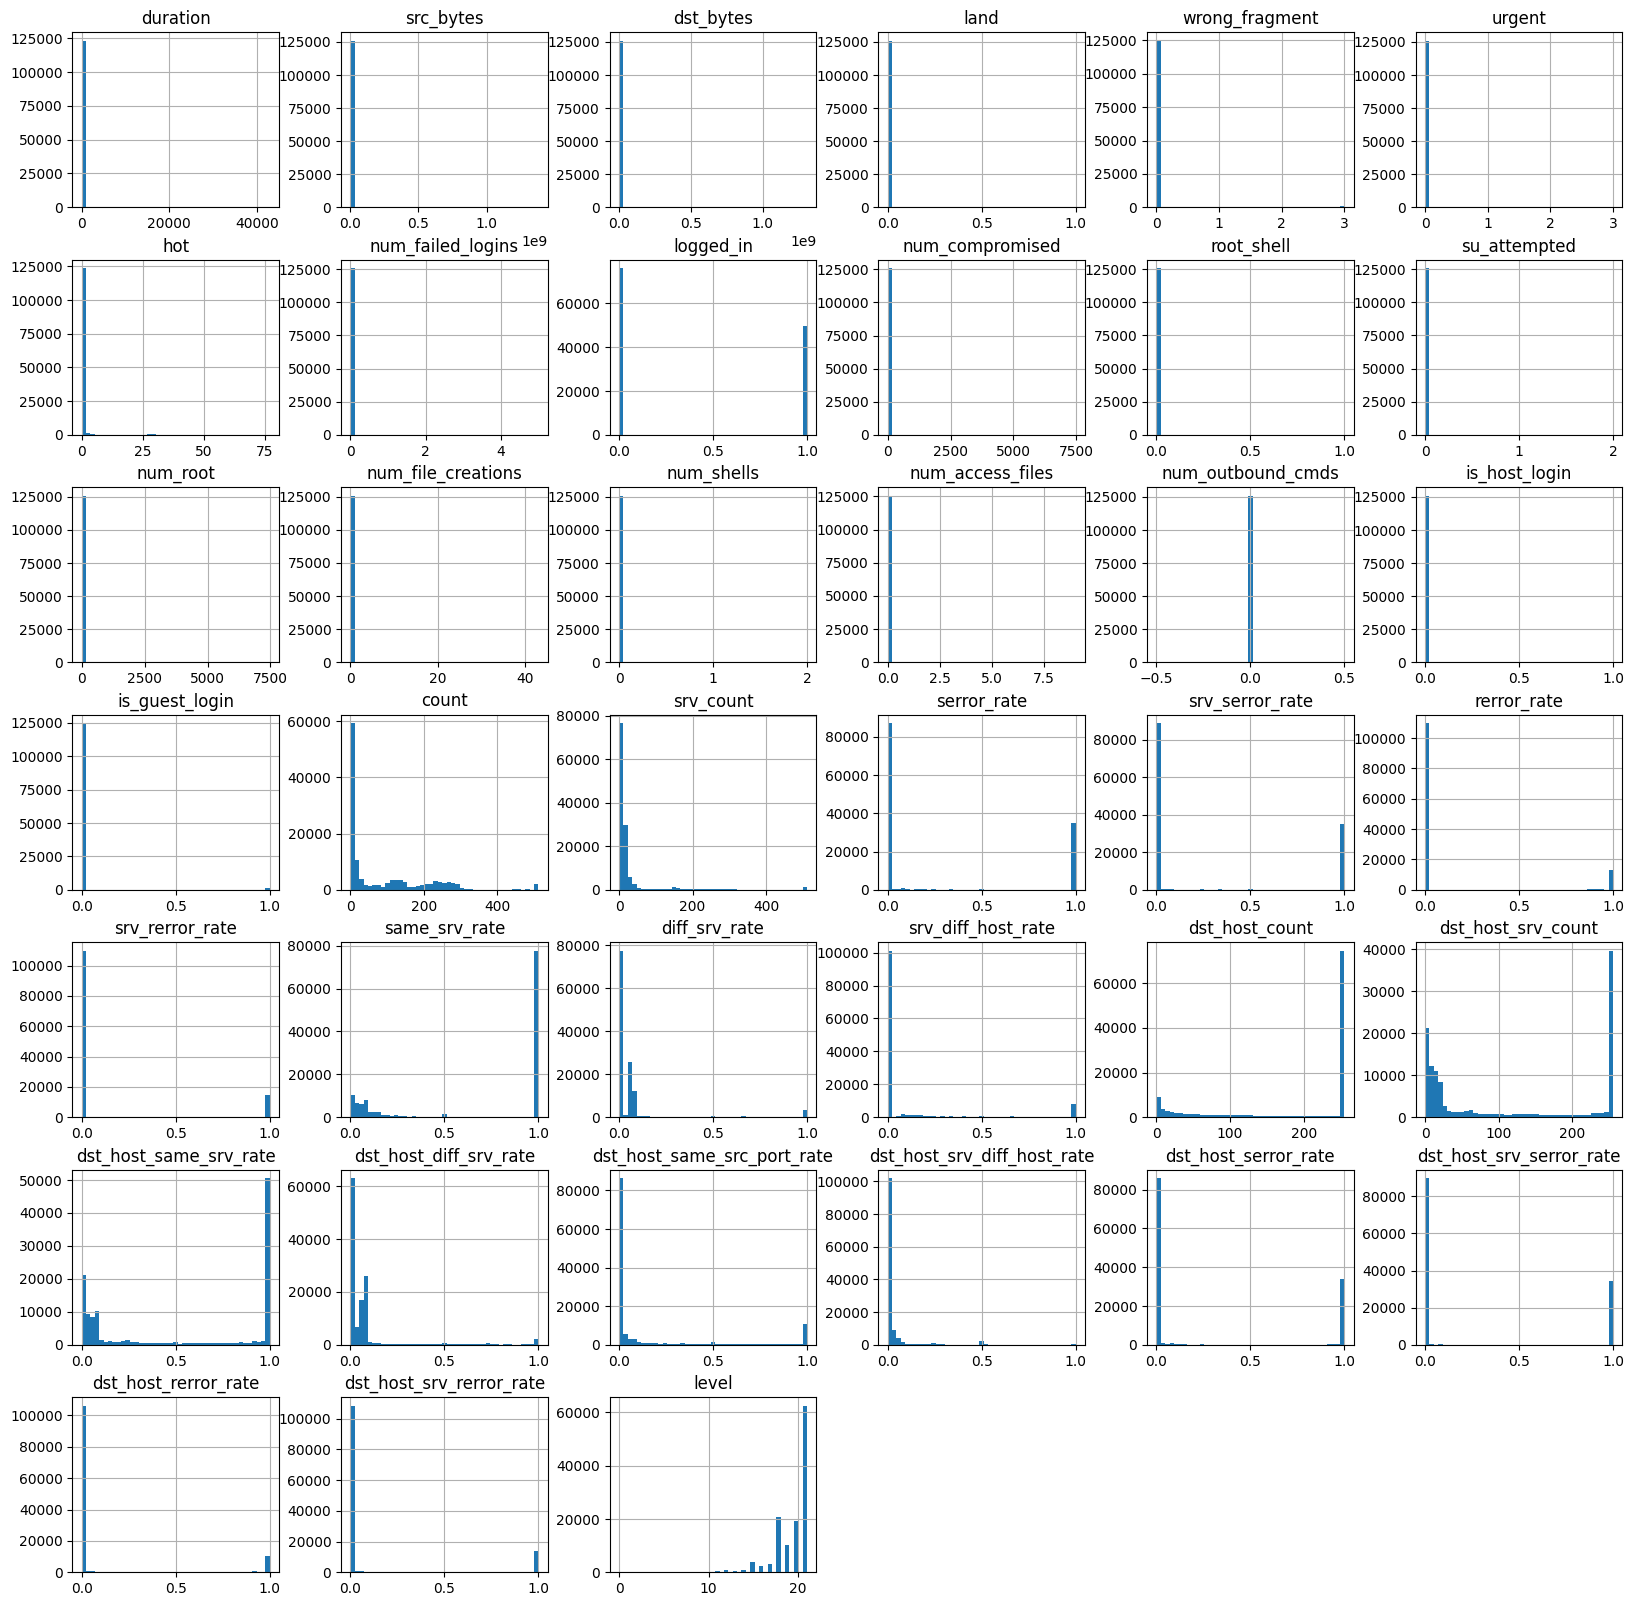

In [ ]:
df.hist(bins=43,figsize=(20,20))

## 4.1 Protocol Type

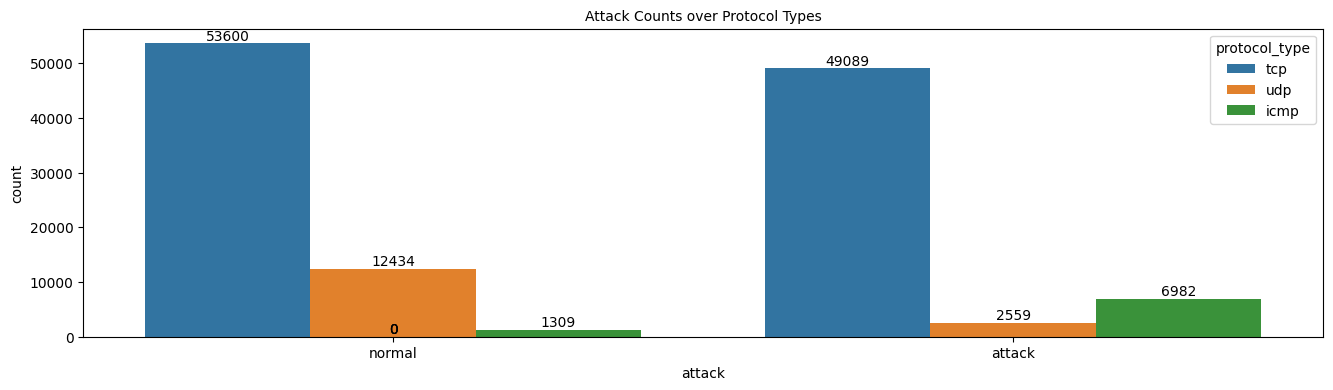

In [ ]:
plt.figure(figsize=(16,4))
ax = sns.countplot(x='attack',data=df,hue='protocol_type')
for p in ax.patches:
    ax.annotate(
        f"{int(p.get_height())}",  
        (p.get_x() + p.get_width() / 2., p.get_height()),  
        ha='center', va='bottom', fontsize=10
    )

plt.title('Attack Counts over Protocol Types',fontdict={'fontsize':10})
plt.show()

Most of the attacks are from tcp, then icmp, and least attack comes from udp

In [ ]:
df["protocol_type"].value_counts(normalize=True)

protocol_type
tcp     0.815167
udp     0.119018
icmp    0.065816
Name: proportion, dtype: float64

## 4.2 Service used general

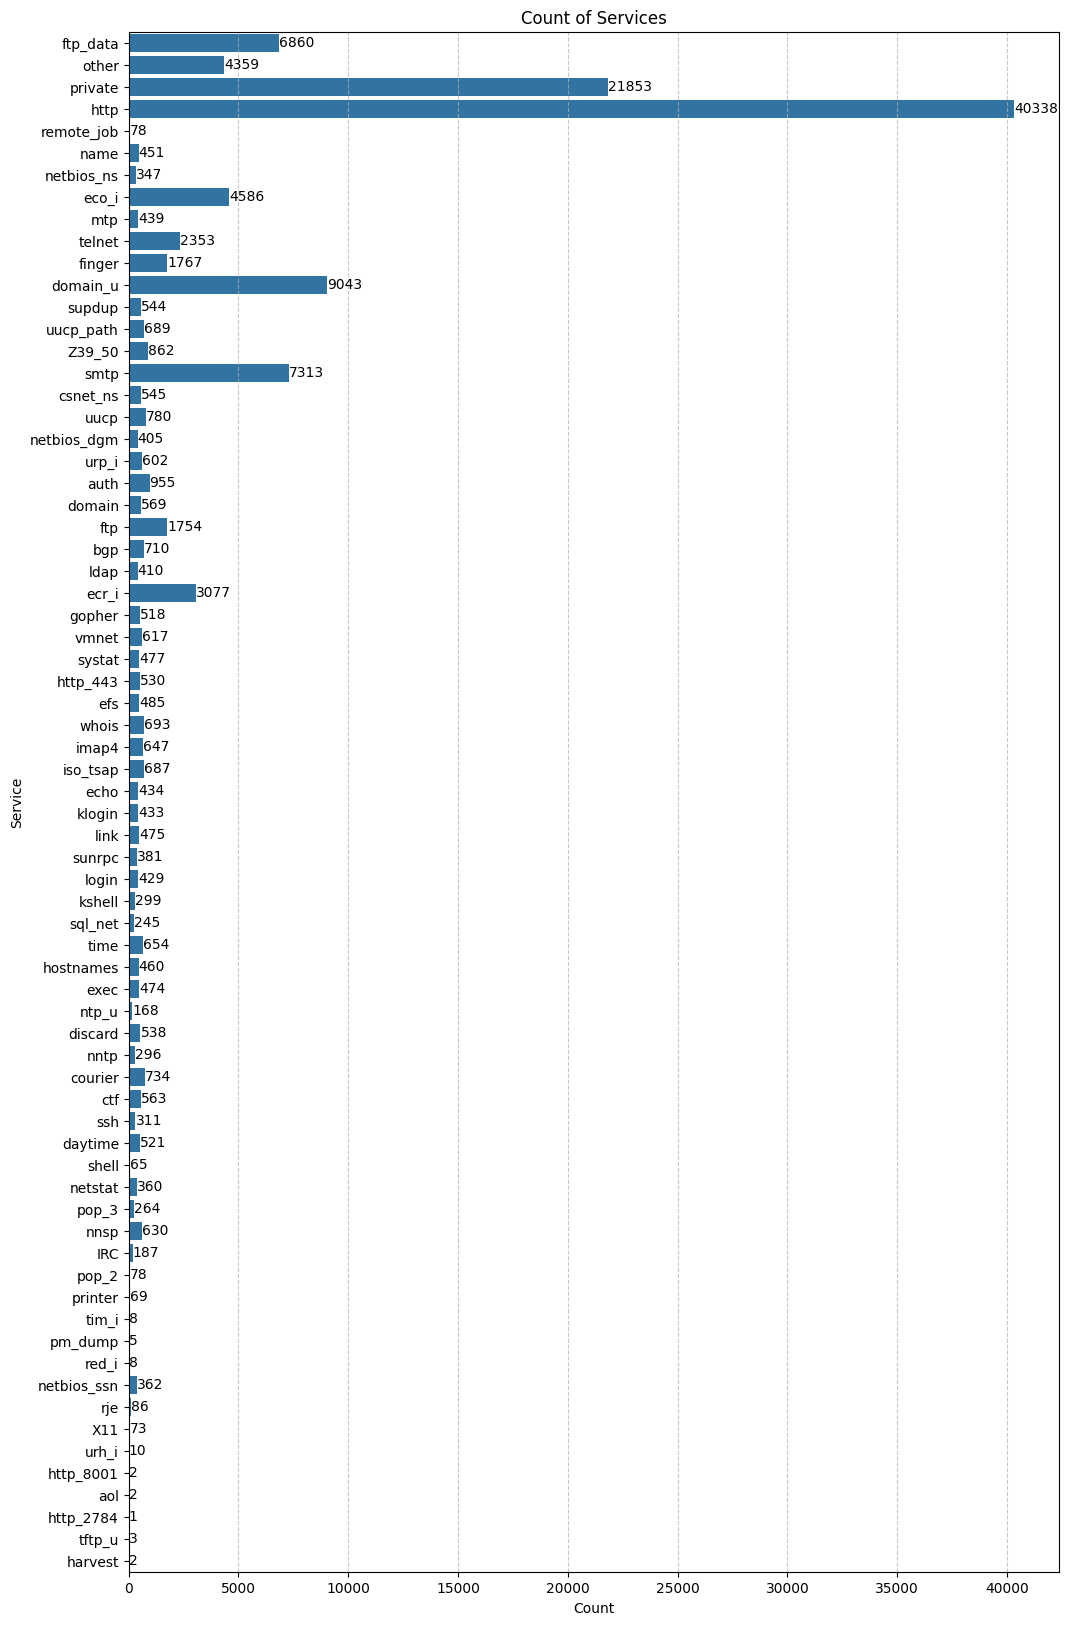

In [ ]:
plt.figure(figsize=(12, 20))  # Adjust figure size for better readability
ax = sns.countplot(y='service', data=df) 
# Add count labels to bars
for p in ax.patches:
    ax.annotate(
        f"{int(p.get_width())}",  # Get count value
        (p.get_width(), p.get_y() + p.get_height() / 2.),  # Position the text
        ha='left', va='center', fontsize=10  # Align left for better readability
    )

# Labels and title
plt.xlabel('Count')
plt.ylabel('Service')
plt.title('Count of Services')

# Add grid
plt.grid(True, axis='x', linestyle='--', alpha=0.7)

# Show the plot
plt.show()


Services most used http,private,domain_u,smtp, ftp,....

## 4.3 Service used effect on attacks

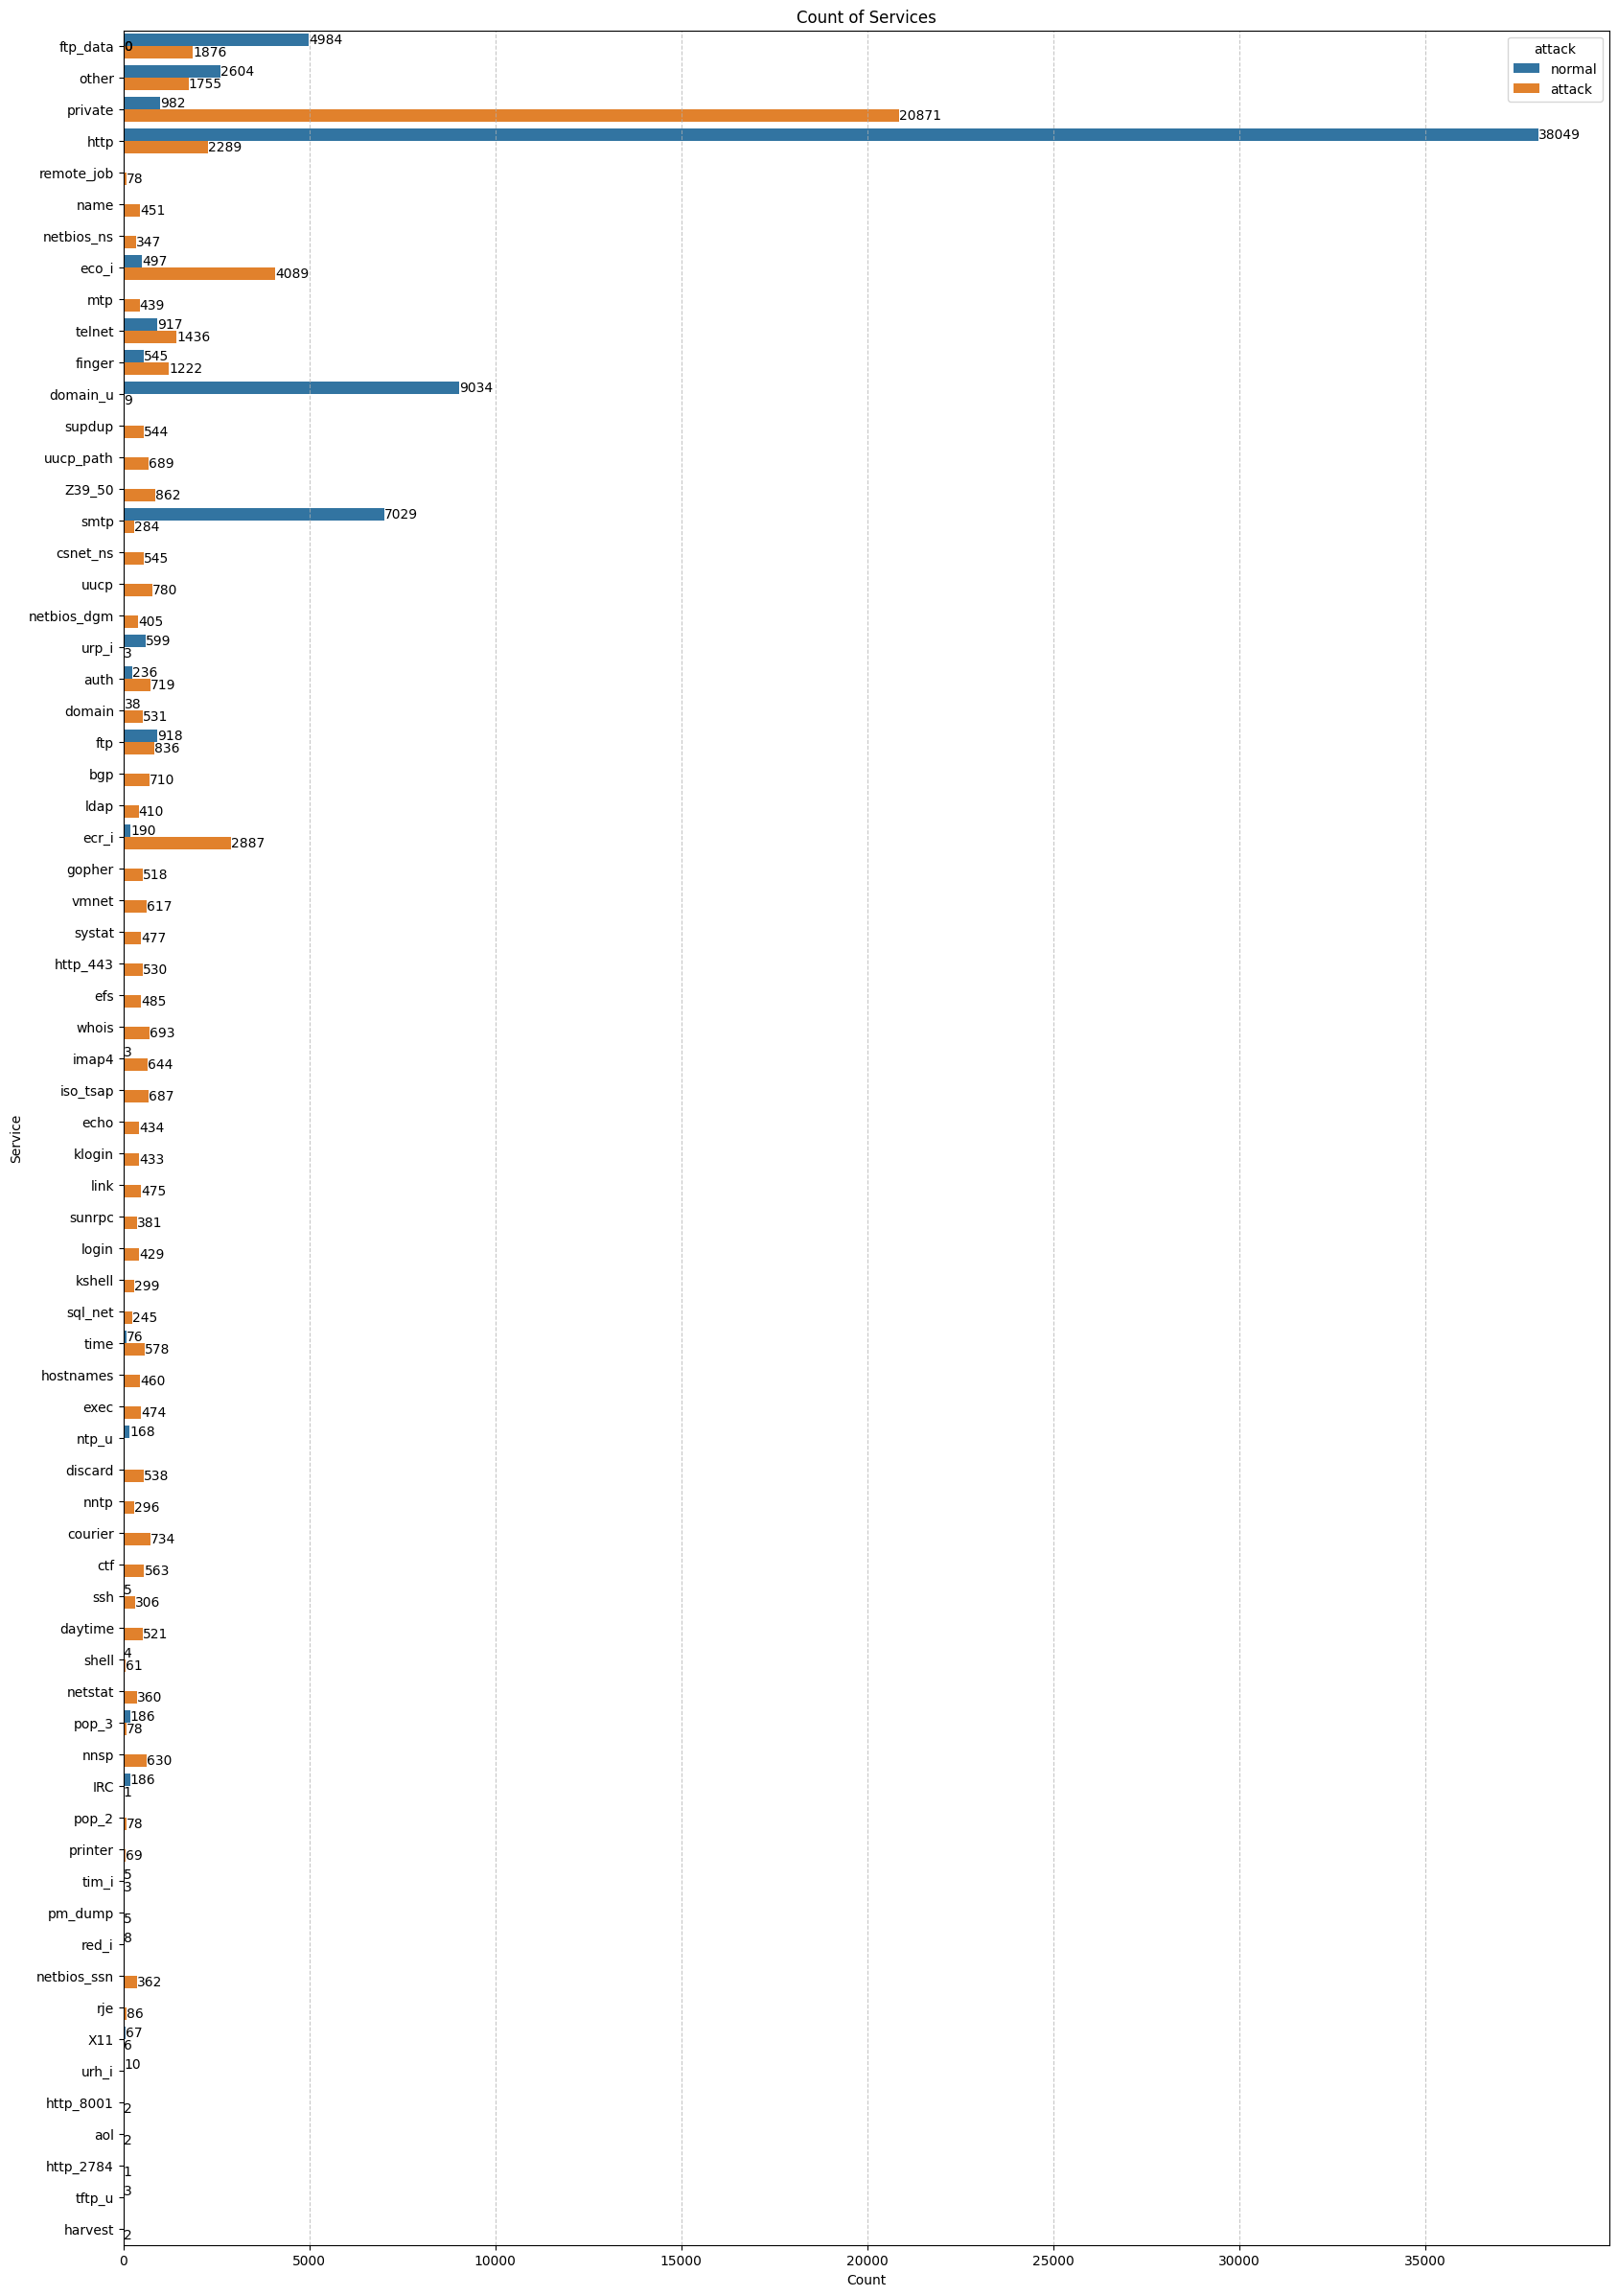

In [ ]:
plt.figure(figsize=(20, 30))  # Adjust figure size for better readability
ax = sns.countplot(y='service', data=df, hue='attack') 
# Add count labels to bars
for p in ax.patches:
    ax.annotate(
        f"{int(p.get_width())}",  # Get count value
        (p.get_width(), p.get_y() + p.get_height() / 2.),  # Position the text
        ha='left', va='center', fontsize=10  # Align left for better readability
    )

# Labels and title
plt.xlabel('Count')
plt.ylabel('Service')
plt.title('Count of Services')

# Add grid
plt.grid(True, axis='x', linestyle='--', alpha=0.7)

# Show the plot
plt.show()

Private attacks is most common service 

## 4.4 Kernel Density Estimate (KDE) Plot of Duration by Flag

<Figure size 1200x800 with 0 Axes>

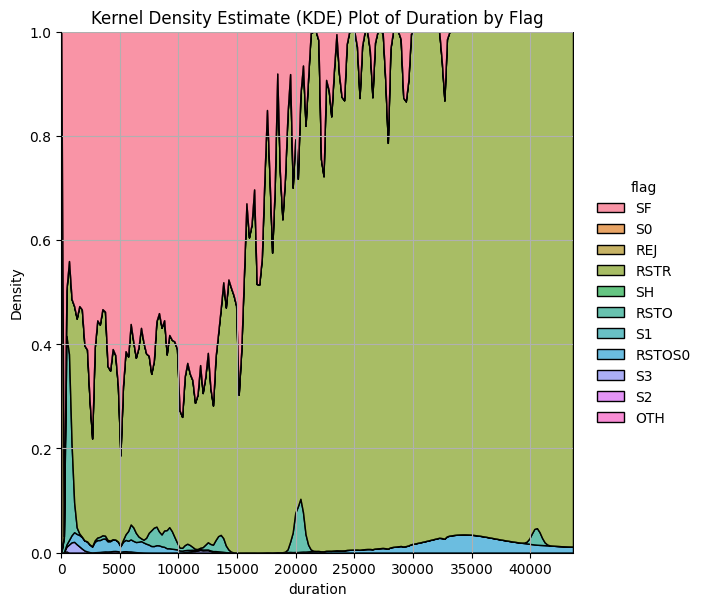

In [ ]:
plt.figure(figsize=(12, 8))
sns.displot(
    data=df,
    x="duration",
    hue="flag",
    kind="kde",
    height=6,
    multiple="fill",
    clip=(0, None)
    
)
plt.title('Kernel Density Estimate (KDE) Plot of Duration by Flag')
plt.grid(True)
plt.show()

## 4.5 Distribution of Attack Types by Guest Login

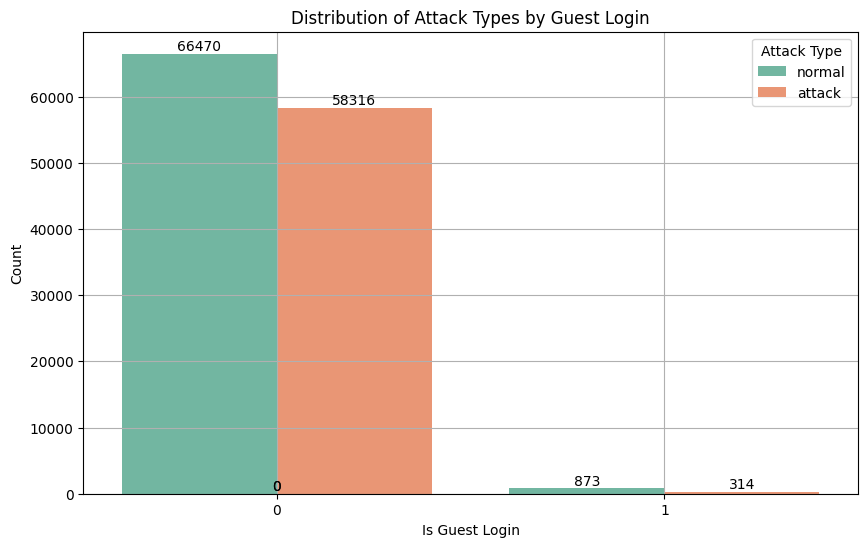

In [ ]:
plt.figure(figsize=(10, 6))
ax = sns.countplot(x='is_guest_login', hue='attack', data=df, palette='Set2')

for p in ax.patches:
    ax.annotate(
        f"{int(p.get_height())}",  
        (p.get_x() + p.get_width() / 2., p.get_height()),  
        ha='center', va='bottom', fontsize=10,
    )

plt.xlabel('Is Guest Login')
plt.ylabel('Count')
plt.title('Distribution of Attack Types by Guest Login')
plt.legend(title='Attack Type')
plt.grid(True)
plt.show()

Attacks are comes when guest is not login

# 5  PREPROCESSING

## 5.1 Encoding

In [ ]:
cat_features = df.select_dtypes(include='object').columns
cat_features

Index(['protocol_type', 'service', 'flag', 'attack'], dtype='object')

In [ ]:
le=preprocessing.LabelEncoder()
clm=['protocol_type', 'service', 'flag', 'attack']
for x in clm:
    df[x]=le.fit_transform(df[x])

## 5.2 Train-Test-Split

In [ ]:
X = df.drop(["attack"], axis=1)
y = df["attack"]

X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.1,random_state=43) 

In [ ]:
train_index = X_train.columns
train_index

Index(['duration', 'protocol_type', 'service', 'flag', 'src_bytes',
       'dst_bytes', 'land', 'wrong_fragment', 'urgent', 'hot',
       'num_failed_logins', 'logged_in', 'num_compromised', 'root_shell',
       'su_attempted', 'num_root', 'num_file_creations', 'num_shells',
       'num_access_files', 'num_outbound_cmds', 'is_host_login',
       'is_guest_login', 'count', 'srv_count', 'serror_rate',
       'srv_serror_rate', 'rerror_rate', 'srv_rerror_rate', 'same_srv_rate',
       'diff_srv_rate', 'srv_diff_host_rate', 'dst_host_count',
       'dst_host_srv_count', 'dst_host_same_srv_rate',
       'dst_host_diff_srv_rate', 'dst_host_same_src_port_rate',
       'dst_host_srv_diff_host_rate', 'dst_host_serror_rate',
       'dst_host_srv_serror_rate', 'dst_host_rerror_rate',
       'dst_host_srv_rerror_rate', 'level'],
      dtype='object')

## 5.3 Feature Engineering

In [ ]:
mutual_info = mutual_info_classif(X_train, y_train)
mutual_info = pd.Series(mutual_info)
mutual_info.index = train_index
mutual_info.sort_values(ascending=False)

src_bytes                      0.567062
service                        0.468848
dst_bytes                      0.441114
flag                           0.369821
same_srv_rate                  0.367823
diff_srv_rate                  0.361398
dst_host_srv_count             0.335533
dst_host_same_srv_rate         0.312645
logged_in                      0.292076
dst_host_serror_rate           0.288118
dst_host_diff_srv_rate         0.285571
dst_host_srv_serror_rate       0.282473
serror_rate                    0.277824
srv_serror_rate                0.268913
count                          0.266287
dst_host_srv_diff_host_rate    0.189060
level                          0.152826
dst_host_count                 0.145662
dst_host_same_src_port_rate    0.132589
srv_diff_host_rate             0.098444
srv_count                      0.062134
dst_host_srv_rerror_rate       0.061092
protocol_type                  0.054232
rerror_rate                    0.039226
dst_host_rerror_rate           0.037703


<Axes: >

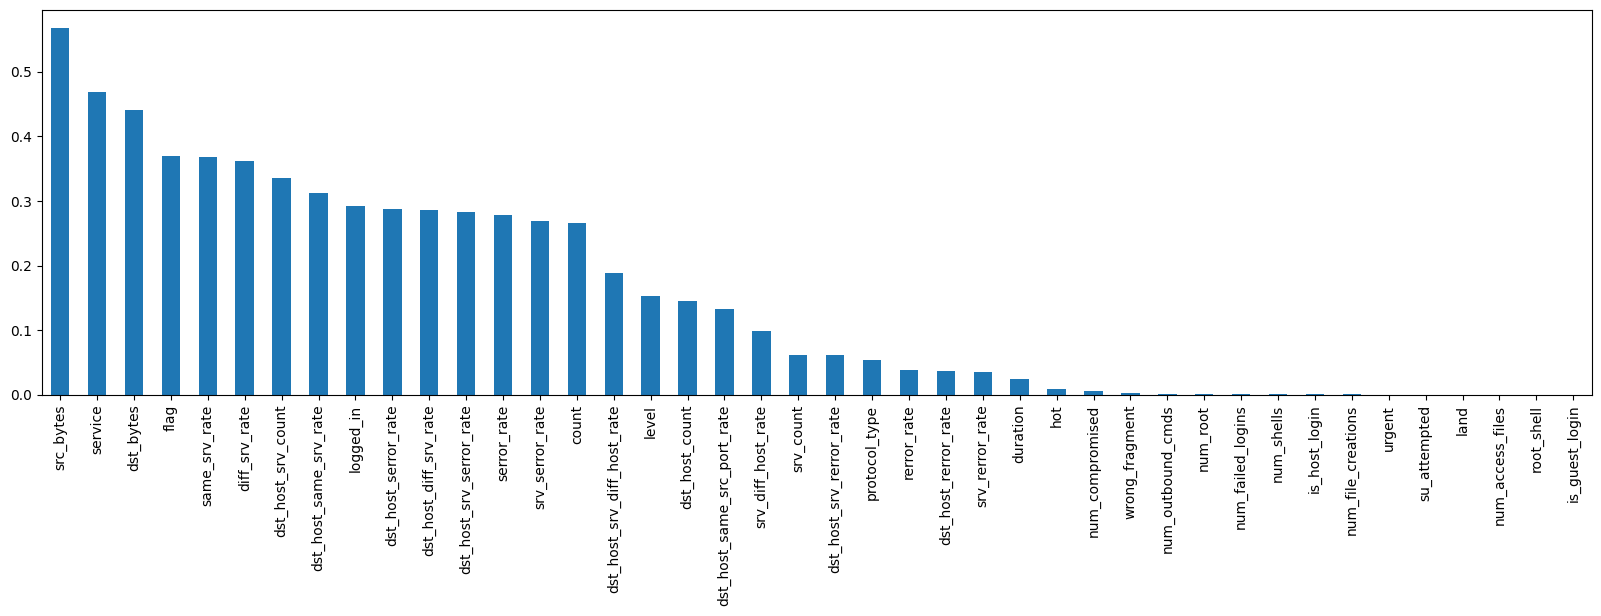

In [ ]:
mutual_info.sort_values(ascending=False).plot.bar(figsize=(20, 5))

## 5.4 Feature Selection

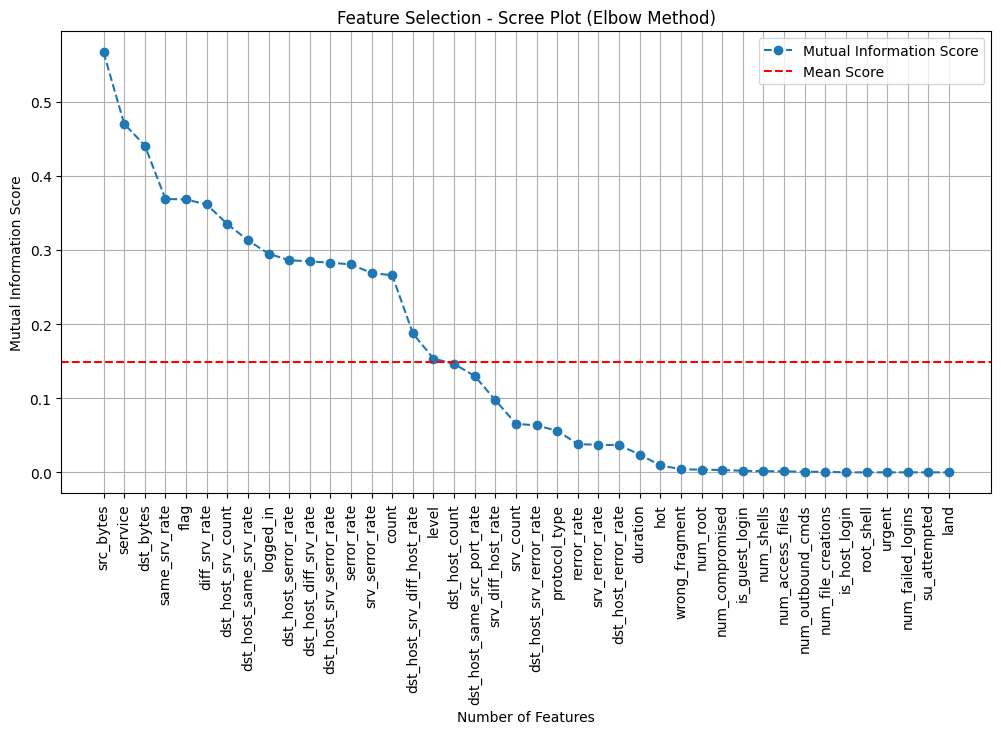

In [ ]:
# Load dataset (Assume df is already preprocessed)
X = df.drop(columns=["attack"])
y = df["attack"]

# Compute Mutual Information scores for all features
scores = mutual_info_classif(X, y)

# Sort features by importance
sorted_indices = np.argsort(scores)[::-1]
sorted_scores = np.array(scores)[sorted_indices]
sorted_features = X.columns[sorted_indices]

# ---- Scree Plot (Elbow Method) ----
plt.figure(figsize=(12, 6))
plt.plot(range(1, len(sorted_scores) + 1), sorted_scores, marker="o", linestyle="--", label="Mutual Information Score")
plt.axhline(np.mean(sorted_scores), color="r", linestyle="--", label="Mean Score")  # Mean threshold
plt.xlabel("Number of Features")
plt.ylabel("Mutual Information Score")
plt.title("Feature Selection - Scree Plot (Elbow Method)")
plt.xticks(range(1, len(sorted_scores) + 1), sorted_features, rotation=90)
plt.legend()
plt.grid()
plt.show()

In [ ]:
# ---- Automatic Feature Selection ----
selector = SelectKBest(score_func=mutual_info_classif, k="all")
selector.fit(X, y)
scores = selector.scores_

# Determine optimal k based on percentile (more robust than just mean)
mean_score = np.mean(scores)
percentile_75 = np.percentile(scores, 75)  # Consider top 25% important features
k_auto = sum(scores > percentile_75)

print(f"Auto-Detected Optimal K: {k_auto}")

Auto-Detected Optimal K: 11


In [ ]:
selector = SelectKBest(score_func=mutual_info_classif, k=11)
X_selected = selector.fit_transform(X, y)

In [ ]:
selected_features = X.columns[selector.get_support()]
print("Top 11 Features:", selected_features.tolist())

Top 11 Features: ['service', 'flag', 'src_bytes', 'dst_bytes', 'logged_in', 'same_srv_rate', 'diff_srv_rate', 'dst_host_srv_count', 'dst_host_same_srv_rate', 'dst_host_diff_srv_rate', 'dst_host_serror_rate']


In [ ]:
X_train=X_train[selected_features]
X_test=X_test[selected_features]

## 5.5 Scaling

In [ ]:
scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test) # Only transform in order to prevent data leakage

# 6 MODEL BUILD

## 6.1 Logistic Regression

In [ ]:
lr_model = LogisticRegression(random_state=42)
lr_model.fit(X_train, y_train)

LogisticRegression(random_state=42)

Train Set Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.87      0.89     52740
           1       0.89      0.92      0.91     60635

    accuracy                           0.90    113375
   macro avg       0.90      0.90      0.90    113375
weighted avg       0.90      0.90      0.90    113375



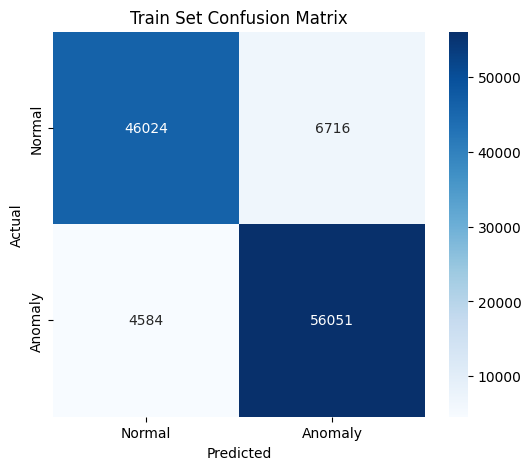

Test Set Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.87      0.89      5890
           1       0.89      0.92      0.91      6708

    accuracy                           0.90     12598
   macro avg       0.90      0.90      0.90     12598
weighted avg       0.90      0.90      0.90     12598



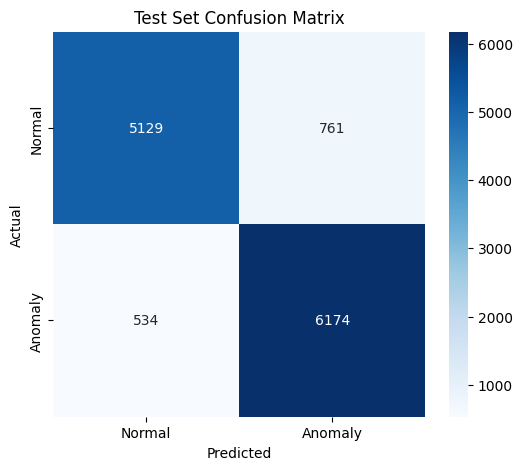

In [ ]:
def plot_confusion_matrix(y_true, y_pred, title):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(6, 5))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Normal", "Anomaly"], yticklabels=["Normal", "Anomaly"])
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.title(title)
    plt.show()

# Predictions
y_train_pred = lr_model.predict(X_train)
y_test_pred = lr_model.predict(X_test)

# Train set evaluation
print("Train Set Classification Report:\n", classification_report(y_train, y_train_pred))
plot_confusion_matrix(y_train, y_train_pred, "Train Set Confusion Matrix")

# Test set evaluation
print("Test Set Classification Report:\n", classification_report(y_test, y_test_pred))
plot_confusion_matrix(y_test, y_test_pred, "Test Set Confusion Matrix")

### 6.1.1 Hyperparameter Tuning

In [ ]:
# Define the hyperparameter grid
param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],  # Regularization strength
    'solver': ['liblinear', 'lbfgs', 'saga'],  # Optimization algorithm
    'penalty': ['l1', 'l2']  # Regularization type
}

# Initialize Logistic Regression
logreg = LogisticRegression(max_iter=500)

# Grid Search with 5-fold Cross-Validation
grid_search = GridSearchCV(logreg, param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train, y_train)

# Print Best Parameters
print("Best Hyperparameters:", grid_search.best_params_)
print("Best Cross-Validation Accuracy:", grid_search.best_score_)

# Train Final Model with Best Params
best_logreg = grid_search.best_estimator_

# Evaluate on Test Set
y_pred = best_logreg.predict(X_test)
print("Test Set Performance:\n", classification_report(y_test, y_pred))

Best Hyperparameters: {'C': 1, 'penalty': 'l1', 'solver': 'saga'}
Best Cross-Validation Accuracy: 0.9003748621830209
Test Set Performance:
               precision    recall  f1-score   support

           0       0.91      0.87      0.89      5890
           1       0.89      0.92      0.91      6708

    accuracy                           0.90     12598
   macro avg       0.90      0.90      0.90     12598
weighted avg       0.90      0.90      0.90     12598



## 6.2 Random Forest

In [ ]:
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

Train Set Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     52740
           1       1.00      1.00      1.00     60635

    accuracy                           1.00    113375
   macro avg       1.00      1.00      1.00    113375
weighted avg       1.00      1.00      1.00    113375



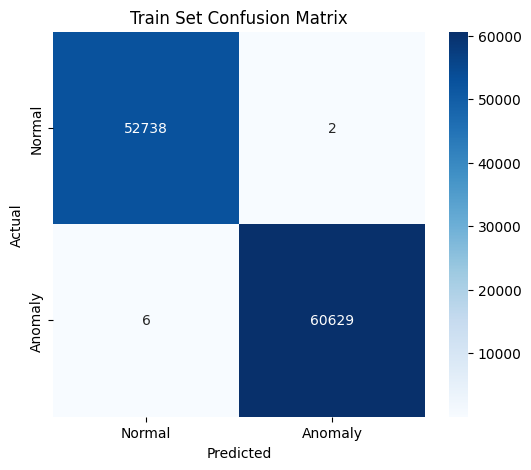

Test Set Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      5890
           1       1.00      1.00      1.00      6708

    accuracy                           1.00     12598
   macro avg       1.00      1.00      1.00     12598
weighted avg       1.00      1.00      1.00     12598



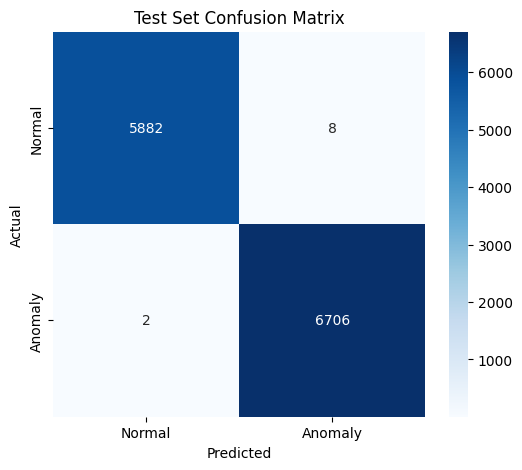

In [ ]:
y_train_pred = rf_model.predict(X_train)
y_test_pred = rf_model.predict(X_test)

# Train set evaluation
print("Train Set Classification Report:\n", classification_report(y_train, y_train_pred))
plot_confusion_matrix(y_train, y_train_pred, "Train Set Confusion Matrix")

# Test set evaluation
print("Test Set Classification Report:\n", classification_report(y_test, y_test_pred))
plot_confusion_matrix(y_test, y_test_pred, "Test Set Confusion Matrix")

In [ ]:
import pandas as pd

# Convert X_train to DataFrame if needed
df1 = pd.DataFrame(X_train)
df1["target"] = y_train  # Add target column

# Check correlation between features and target
print(df1.corr()["target"].sort_values(ascending=False))


target    1.000000
10        0.002542
9         0.000922
2         0.000266
0        -0.000691
5        -0.000860
1        -0.001482
3        -0.002350
6        -0.002807
8        -0.002868
4        -0.003159
7        -0.005498
Name: target, dtype: float64


No single feature has a strong correlation with the target => No Data Leakage

In [ ]:
# Reduce Overfitting by Limiting Model Depth
rf_model = RandomForestClassifier(n_estimators=50, max_depth=5, min_samples_split=15, random_state=42)
rf_model.fit(X_train, y_train)

print("New Test Accuracy:", rf_model.score(X_test, y_test))

New Test Accuracy: 0.9859501508175901


In [ ]:
# Check Cross-Validation Score
cv_scores = cross_val_score(rf_model, X_train, y_train, cv=5)
print("Cross-validation accuracy:", cv_scores.mean())

Cross-validation accuracy: 0.9860992282249172


No major overfitting 

# 7 RESULT


'service', 'flag', 'src_bytes', 'dst_bytes', 'logged_in', 'same_srv_rate', 'diff_srv_rate', 'dst_host_srv_count', 'dst_host_same_srv_rate', 'dst_host_diff_srv_rate', 'dst_host_serror_rate'